# Calour sample analysis notebook
This notebook uses the Chronic Fatigue Syndrome dataset from:

Giloteaux, Ludovic, et al., Microbiome 4.1 (2016): 30.
"Reduced diversity and altered composition of the gut microbiome in individuals with myalgic encephalomyelitis/chronic fatigue syndrome."

(See: https://microbiomejournal.biomedcentral.com/articles/10.1186/s40168-016-0171-4 )

But can be used for any amplicon experiment. Just need to provide a biom table and a mapping file.

### NOTE: full Calour documentation can be found [here](http://biocore.github.io/calour/)

The original notebook was developed for the Sheba/TAU microbiome analysis workshop (http://borensteinlab.com/events/microbiome_workshop/sandbox.html).

In [1]:
!pip install calour


     |████████████████████████████████| 92kB 3.4MB/s 
     |████████████████████████████████| 8.3MB 8.0MB/s 
     |████████████████████████████████| 11.8MB 198kB/s 
  Created wheel for calour: filename=calour-2018.5.1-cp36-none-any.whl size=98525 sha256=3309a05b50d69777be4780be2fd3a7bb60c2bce1ff37b3cf67ca3a308e6d242a
  Stored in directory: /root/.cache/pip/wheels/ab/a2/e0/b12fe1f83f511b521768fd414ae7b6d618f8544a0fd660c89d
  Created wheel for scikit-bio: filename=scikit_bio-0.5.5-cp36-cp36m-linux_x86_64.whl size=1375693 sha256=864ea73500fb33d49e1e6058cb7b78da0f158a16528a3966219db58d131811a9
  Stored in directory: /root/.cache/pip/wheels/0d/e6/e6/427e994318de532b2e44b8bc975f26774087a204082f208100
  Created wheel for biom-format: filename=biom_format-2.1.7-cp36-cp36m-linux_x86_64.whl size=12093581 sha256=9a1f1768c3058a7d98b6f167edd9ca983b874c955be8ae9119c2cd73bd28988d
  Stored in directory: /root/.cache/pip/wheels/1a/62/a8/b8881b0d3da81d55d38e4c3ca9f9375b061be2543cc221c56b
  Created wheel

In [0]:
import calour as ca

# will disable "future warnings"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd


In [0]:
# Configure matplotlib figures 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# Load the dataset
min_reads=1000 : throw away all samples with < 1000 reads

normalize=10000 : normalize total reads of each samples to 10000

(NOTE: this is not rarefaction - so samples with < 10000 reads will be streched to 10000 reads

Full function documentation [here](http://biocore.github.io/calour/generated/calour.io.read_amplicon.html#calour.io.read_amplicon)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **YOU NEED TO UPLOAD THE FILES ("cfs.biom" and "cfs.map.txt") TO YOUR GOOGLE DRIVE AND ADJUST THE PATH IN THE NEXT CELL TO YOUR SYSTEM!** 
The files can be found here: http://borensteinlab.com/events/microbiome_workshop/files/

In [5]:
dat = ca.read_amplicon('/content/drive/My Drive/Colab Notebooks/data/cfs.biom','/content/drive/My Drive/Colab Notebooks/data/cfs.map.txt',normalize=10000,min_reads=1000)

2019-12-01 13:37:21 WARNING These have metadata but do not have data - dropped: {'ERR1331814'}


## What do we have
NOTE: "features" means "bacteria" for amplicon data

In [6]:
print(dat)

AmpliconExperiment ("cfs.biom") with 87 samples, 2129 features


### Also lets see the sample_metadata (mapping file) columns
The sample metadata is stored as a pandas dataframe

In [0]:
print(dat.sample_metadata.columns)

Index(['Sample_Name_s', 'collection_date_s', 'environment_biome_s',
       'environmental_package_s', 'geographic_location_country_and_or_sea_s',
       'Pittsburgh', 'Energy_fatigue', 'sCD14ugml', 'Sex', 'IFABPpgml',
       'General_health', 'LBPugml', 'Social_functioning', 'Role_emotio0l',
       'LPSpgml', 'Subject', 'Emotio0l_well_being', 'Role_physical', 'Bell',
       'Physical_functioning', 'Pain', 'Age', 'BMI', '_sample_id',
       '_calour_original_abundance'],
      dtype='object')


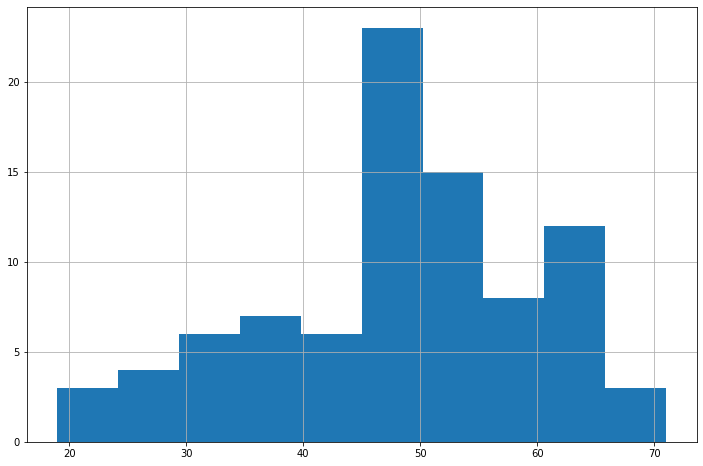

In [0]:
dat.sample_metadata['Age'].hist()

# Remove low abundance bacteria
we remove all bacteria with sum of reads < 10 reads total over all samples.

A tutorial notebook dealing with data manipulation is located [here](http://biocore.github.io/calour/notebooks/microbiome_manipulation.html)

In [0]:
dat = dat.filter_abundance(10)

In [0]:
print(dat)

AmpliconExperiment ("cfs.biom") with 87 samples, 1100 features


In [0]:
dat.to_pandas().head()

TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGG  ...  TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTTAATTAAGTTAGTGGTCAAATCCGGAGGCTTCACTTCCGATCGCCATTAAAACTGATTAGCTAGAGAATGGACGAGGTAGGCGGAATAAGTTAA
#SampleID                                                                                                                                                           ...                                                                                                                                                        
ERR1331798                                        3177.441760                                                                                                       ...                                                0.0                                                                                                     
ERR1331812                                        2592.319821                                                                                                       ...                                                0.0                                                                                                     
ERR1331836                                        1123.731867                                                                                                       ...                                                0.0                                                                                                     
ERR1331831                                         122.231013                                                                                                       ...                                                0.0                                                                                                     
ERR1331815                                        1407.082844                                                                                                       ...                                                0.0                                                                                                     

[5 rows x 1100 columns]

# Cluster the bacteria

In [0]:
dat = dat.cluster_features()

# Sort the samples according to the sick/healthy column

In [0]:
dat = dat.sort_samples('Subject')

# And plot the data
### For full information about the plot function, see [here](http://biocore.github.io/calour/generated/calour.heatmap.plot.html#calour.heatmap.plot)

### interactive heatmap inside the notebook
Can click on a row/column to get information,

2019-11-30 21:03:27 WARNING You need to set up jupyter notebook with `%matplotlib notebook`


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

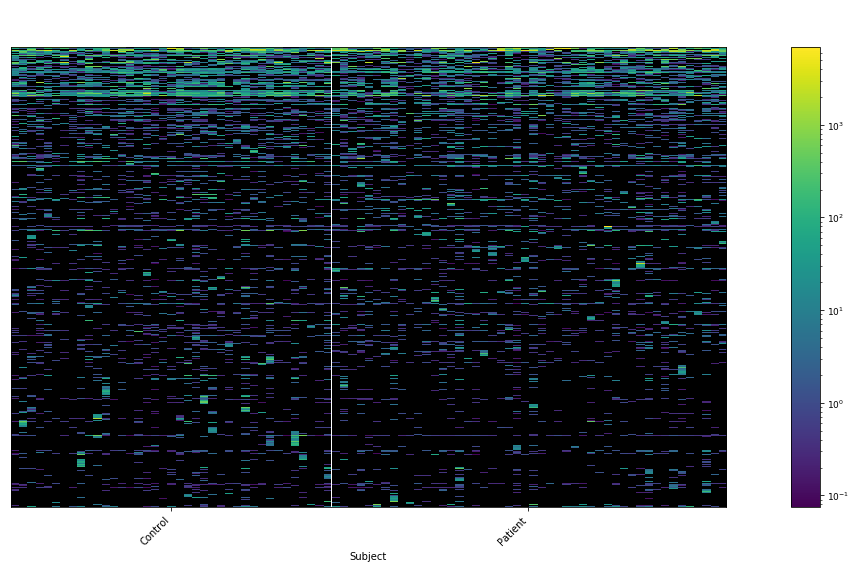

In [0]:
dat.plot(gui='jupyter', sample_field='Subject')
#dat.plot(sample_field='Subject')

# Get differentially abundant bacteria
between sick ('Patient') and healthy ('Control')

A tutorial notebook dealing with differential abundance can be found [here](http://biocore.github.io/calour/notebooks/microbiome_diff_abundance.html)

In [0]:
dd=dat.diff_abundance('Subject','Patient','Control', random_seed=42)

In [0]:
print('there are %d bacteria significantly different between the two groups' % len(dd.feature_metadata))


there are 59 bacteria significantly different between the two groups


Die Sequenzen mit den niedrigsten bzw. höchsten effect values wurden bei der datenbank RDP eingegeben und gesucht

In [0]:
print(dd.feature_metadata['_calour_diff_abundance_effect'])

TACGTAGGGGGCGAGCGTTATCCGGATTCATTGGGCGTAAAGCGCGCGTAGGCGGCCCGGCAGGCCGGGGGTCGAAGCGGGGGGCTCAACCCCCCGAAGCCCCCGGAACCTCCGCGGCTTGGGTCCGGTAGGGGAGGGTGGAACACCCGG   -21.331731
TACGTAGGGGGCGAGCGTTGTCCGGAATGATTGGGCGTAAAGGGCGCGTAGGCGGCCTGCTAAGTCTGGAGTGAAAGTCCTGCTTTCAAGGTGGGAATTGCTTTGGATACTGGTGGGCTGGAGTGCAGGAGAGGAAAGCGGAATTACCGG   -20.588141
TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTCTGCAAGTCAGATGTGAAATCCATGGGCTCAACCCATGAACTGCATTTGAAACTGTAGATCTTGAGTGTCGGAGGGGCAATCGGAATTCCTAG   -17.939103
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCATAACAAGTCTGATGTGAAAGGCTGGGGCTTAACCCCGGGACTGCATTGGAAACTGTTAAGCTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAG   -17.497596
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTTTGCAAGTCTGACGTGAAACTCCGGGGCTCAACTCCGGAACTGCGTTGGAAACTGTAAGGCTTGAGTGCCGGAGAGGTAAGCGGAATTCCTAG   -17.474359
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGAGTGGCAAGTCTGATGTGAAAACCCGGGGCTCAACCCCGGGACTGCATTGGAAACTGTCAATCTAGAGTACCGGAGAGGTAAGCGGAATTCCTAG   -17.288462
TACGTAGGGGGCAAGC

## Plotting the differentially abundant bacteria
We add the y-axis colorbar for the group in which the bacteria was high ('_calour_diff_abundance_group')

Note diff_abundance sorts the different bacteria according to the effect size

2019-11-30 21:03:44 WARNING You need to set up jupyter notebook with `%matplotlib notebook`


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

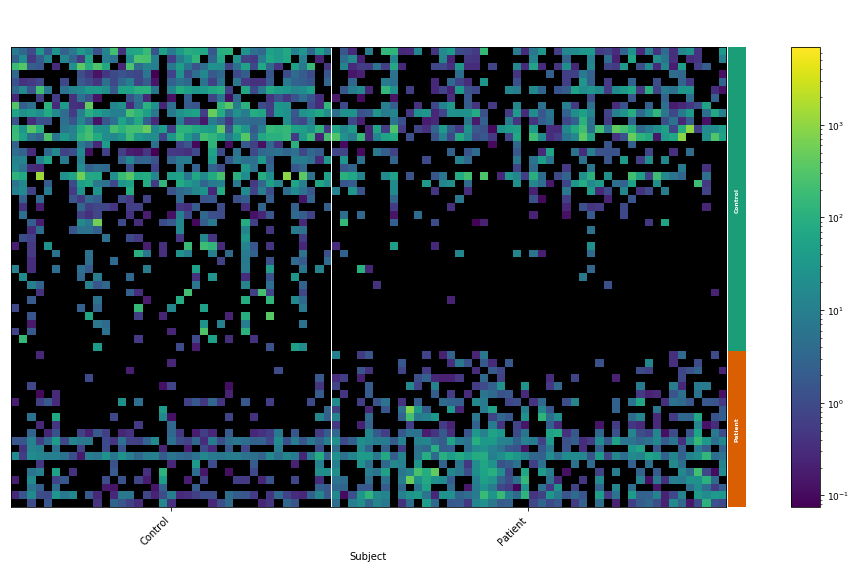

In [0]:
dd.plot(gui='jupyter', sample_field='Subject', bary_fields=['_calour_diff_abundance_group'])

# Looking at dbbact annotations
A tutorial notebook for dbBact interfacing can be found [here](http://biocore.github.io/calour/notebooks/microbiome_databases.html)

You will need the [dbbact-calour](https://github.com/amnona/dbbact-calour) module to be installed in the same conda environment as calour in order to use these functions.
See Calour installation instructions [here](https://github.com/biocore/calour/blob/master/INSTALL.md)

In [11]:
!pip install git+git://github.com/amnona/dbbact-calour

  Cloning git://github.com/amnona/dbbact-calour to /tmp/pip-req-build-yejr2jla
  Running command git clone -q git://github.com/amnona/dbbact-calour /tmp/pip-req-build-yejr2jla
  Created wheel for dbbact-calour: filename=dbbact_calour-0.1-cp36-none-any.whl size=28049148 sha256=e80e4f52ed1fcd84ee3806eb894b3af7ae0d8421df30cd9b0451e7017762b218
  Stored in directory: /tmp/pip-ephem-wheel-cache-h_aug56x/wheels/38/6b/df/e30592057f13258d7cbd8c37574c1ef887e0f0fd53edd05752
Successfully built dbbact-calour


## Enriched terms between the two groups

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa60dc2fa20>,
 Experiment with 59 samples, 322 features)

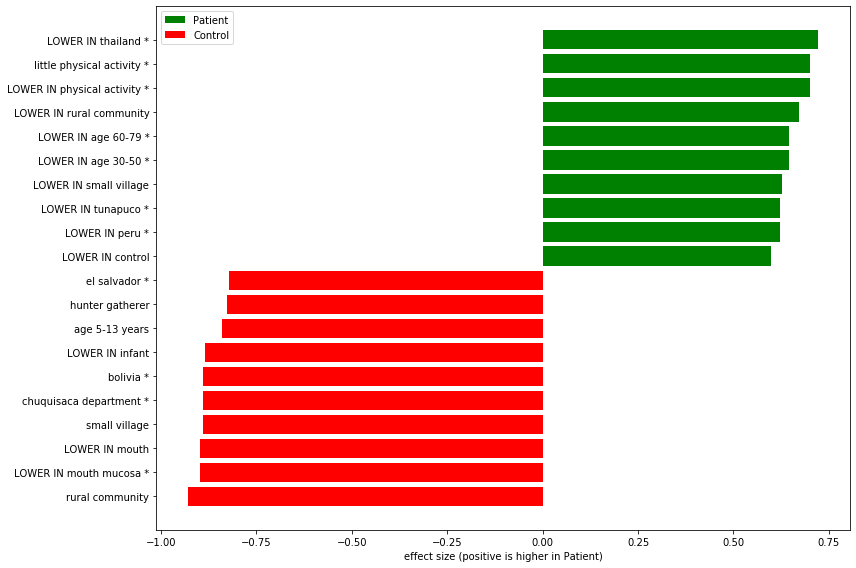

In [0]:
dd.plot_diff_abundance_enrichment()

## Venn diagram for the "small village" term

In [0]:
db=ca.database._get_database_class('dbbact')

In [0]:
dd.feature_metadata['_calour_direction'] = dd.feature_metadata._calour_diff_abundance_group

2019-11-30 21:04:35 WARNING No experiment found matching the details [['DataMD5', '99966db551ad04955c849cf018db31d9'], ['MapMD5', '88f1851e51864c653fd2a13d5c5d3fb8']]
2019-11-30 21:04:35 WARNING No matching experiment found in dbBact. Not ignoring any experiments


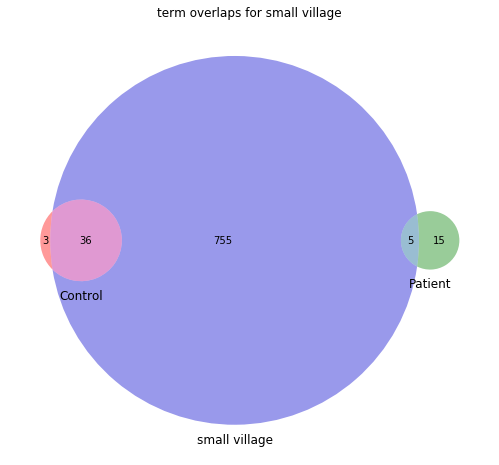

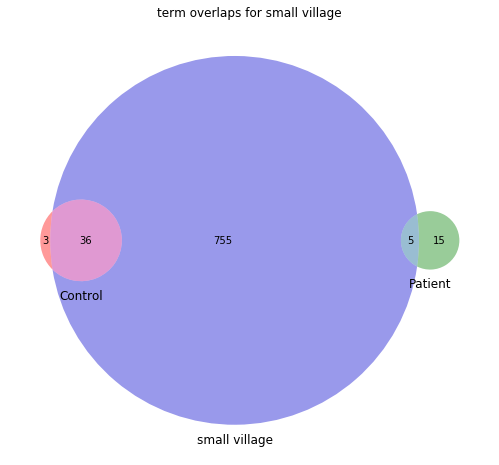

In [0]:
db.plot_term_venn_all(['small village'], dd, ignore_exp=True)

## heatmap for annotations containing "small village"
NOTE: here columns are bacteria, rows are annotations (sorted by experiment, which is the y-axis colorbar)

2019-12-01 13:38:45 WARNING You need to set up jupyter notebook with `%matplotlib notebook`


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

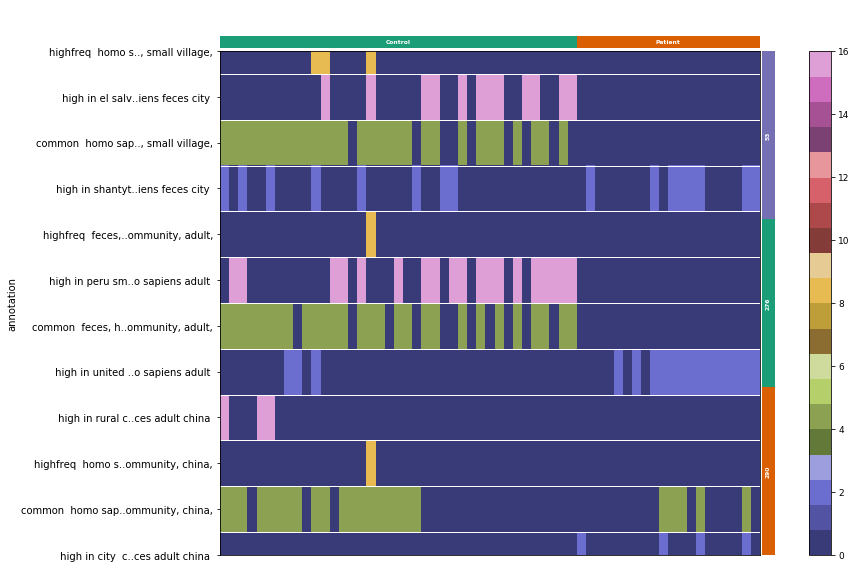

In [14]:
# get the two groups of bacteria and their names (higher in patient, higher in control)
groups = dd.feature_metadata._calour_diff_abundance_group.unique()
g1features = []
g2features = []
g1name = groups[0]
g2name = groups[1]
for cfeature in dd.feature_metadata.index.values:
    if dd.feature_metadata._calour_diff_abundance_group[cfeature] == g1name:
        g1features.append(cfeature)
    if dd.feature_metadata._calour_diff_abundance_group[cfeature] == g2name:
        g2features.append(cfeature)

# plot the term heatmap
term_annotations = db.show_term_details('small village', dd, g1features, g2features, group1_name=g1name, group2_name=g2name, gui='jupyter')

## wordcloud for all the bacteria in the experiment

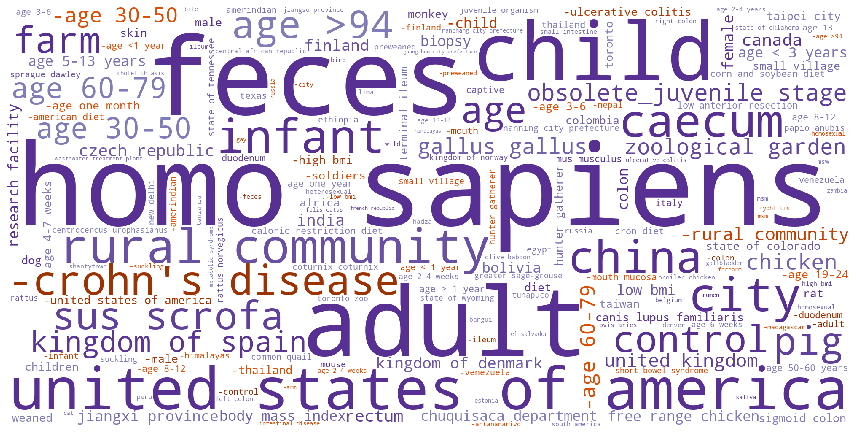

In [15]:
fig=db.draw_wordcloud(dat)

## and wordclouds for the bacteria higher in Patients/Controls

Control
Patient


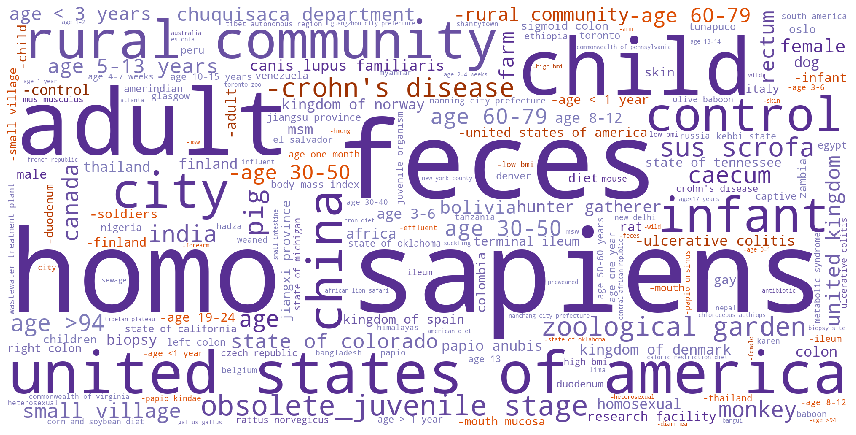

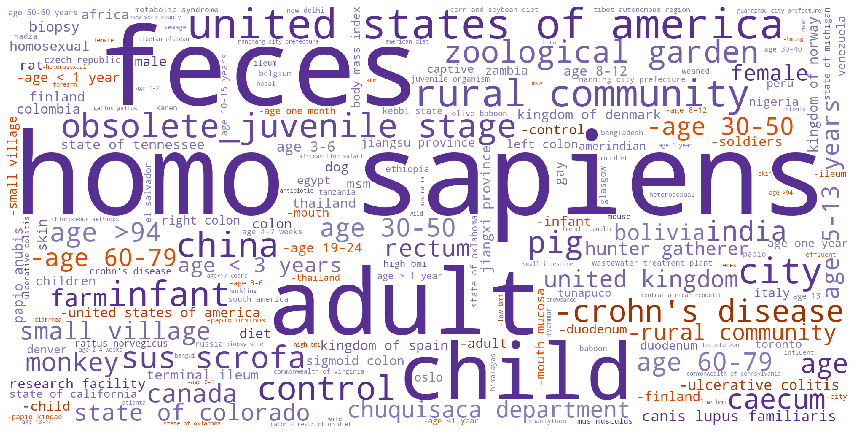

In [16]:
groups = dd.feature_metadata._calour_direction.unique()
g1features = []
g2features = []
g1name = groups[0]
g2name = groups[1]
for cfeature in dd.feature_metadata.index.values:
    if dd.feature_metadata._calour_direction[cfeature] == g1name:
        g1features.append(cfeature)
    if dd.feature_metadata._calour_direction[cfeature] == g2name:
        g2features.append(cfeature)

#%matplotlib notebook
print(g1name)
fig=db.draw_wordcloud(dd, g1features)
print(g2name)
fig=db.draw_wordcloud(dd, g2features)